1. Work to improve the model performance for the diabetes decision tree we created in
class. You should be able to improve the precision and recall to be above .8 and .7
respectively. You can improve the preprocessing OR alter the model itself.

In [99]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
import pydotplus

from IPython.display import Image

diabetes_df = pd.read_csv('../week_13/diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [132]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

#Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [133]:
# decision tree classifier
model = tree.DecisionTreeClassifier(max_depth = 4,random_state=42)

In [134]:
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [135]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[87 13]
 [17 37]]


In [136]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       100
           1       0.74      0.69      0.71        54

    accuracy                           0.81       154
   macro avg       0.79      0.78      0.78       154
weighted avg       0.80      0.81      0.80       154



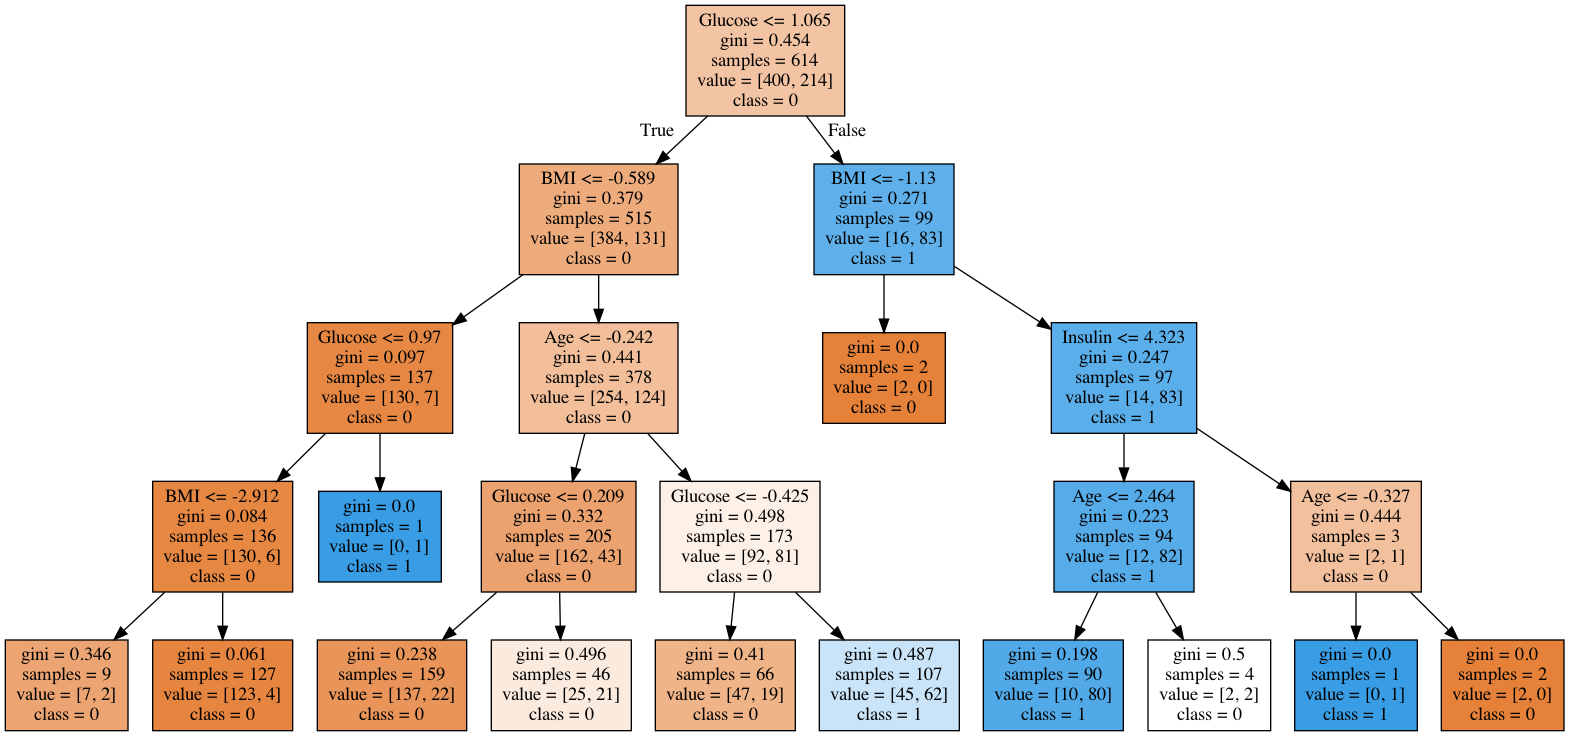

In [137]:
dot_data = tree.export_graphviz(
    model, out_file =None, feature_names=X.columns, class_names = ["0","1"], filled = True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

2. Create a function that accepts an array of names and returns a string formatted as a list
of names separated by commas EXCEPT for the last two names, which are separated
by an ampersand (and sign - &)

Example input:

[ {'name': 'Nichole'}, {'name': 'Tanisha'}, {'name': 'Maggie'} ]

Example output:
Nichole, Tanisha & Maggie

In [97]:
def format_name(names):
    print (', '.join(names[:-1]) + ' & ' + names[-1])

In [98]:
names = [{'name': 'Nichole'}, {'name': 'Tanisha'}, {'name': 'Maggie'}]

new_list=[]
for dic in names:
    for val in dic.values():
        new_list.append(val)
new_list
format_name(new_list)

Nichole, Tanisha & Maggie
